# ✅1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# ✅2:Read and Analysis

In [2]:
dataset=pd.read_csv(r'D:\Projects\projects_uncomplet\Life_Expectancy_Data\data\Life Expectancy Data.csv')

#### shape

In [3]:
print("Shape:", dataset.shape)

Shape: (2938, 22)


#### Info

In [4]:
print("Info:")
dataset.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio         

#### Missing Values

In [5]:
print("\nMissing Values:")
print(dataset.isna().sum())


Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


#### First five rows

In [6]:
print("\nFirst five rows:")
display(dataset.head())



First five rows:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
missing = dataset.isna().mean().sort_values(ascending=False)
missing[missing > 0]

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
 BMI                               0.011572
Diphtheria                         0.006467
Polio                              0.006467
Life expectancy                    0.003404
Adult Mortality                    0.003404
dtype: float64

# ✅3:Data Cleaning

#### Standardize Column Names


In [8]:
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(" ", "_")


#### Remove Duplicates


In [9]:
dataset = dataset.drop_duplicates()

# ✅4: Exploratory Data Analysis (EDA)


#### Distribution of Life Expectancy

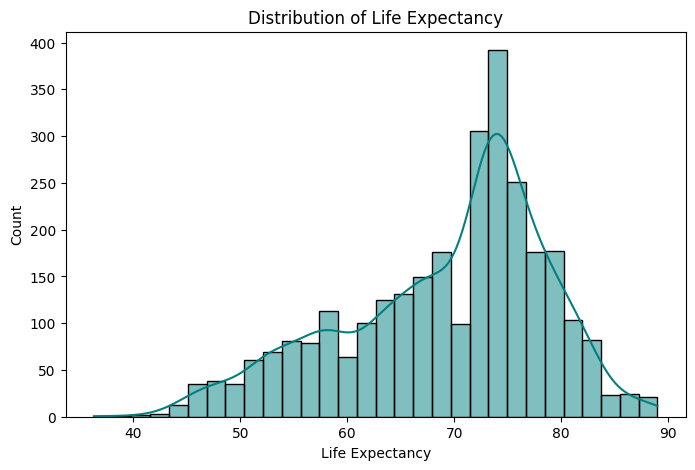

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(dataset["life_expectancy"], bins=30, kde=True, color="teal")
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.show()

#### Life Expectancy by Development Status

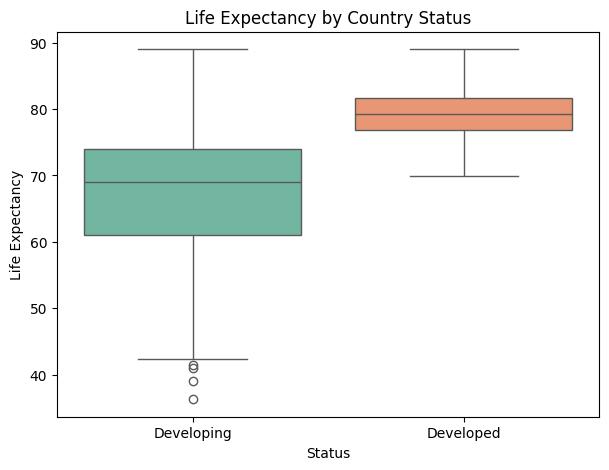

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=dataset,
    x="status",
    y="life_expectancy",
    palette="Set2"
)
plt.title("Life Expectancy by Country Status")
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.show()

# ✅5:Feature Engineering

In [12]:
dataset["health_expenditure_ratio"] = (
    dataset["total_expenditure"] / dataset["gdp"]
)

dataset["education_index"] = (
    dataset["schooling"] * dataset["income_composition_of_resources"]
)

#### Correlation Heatmap

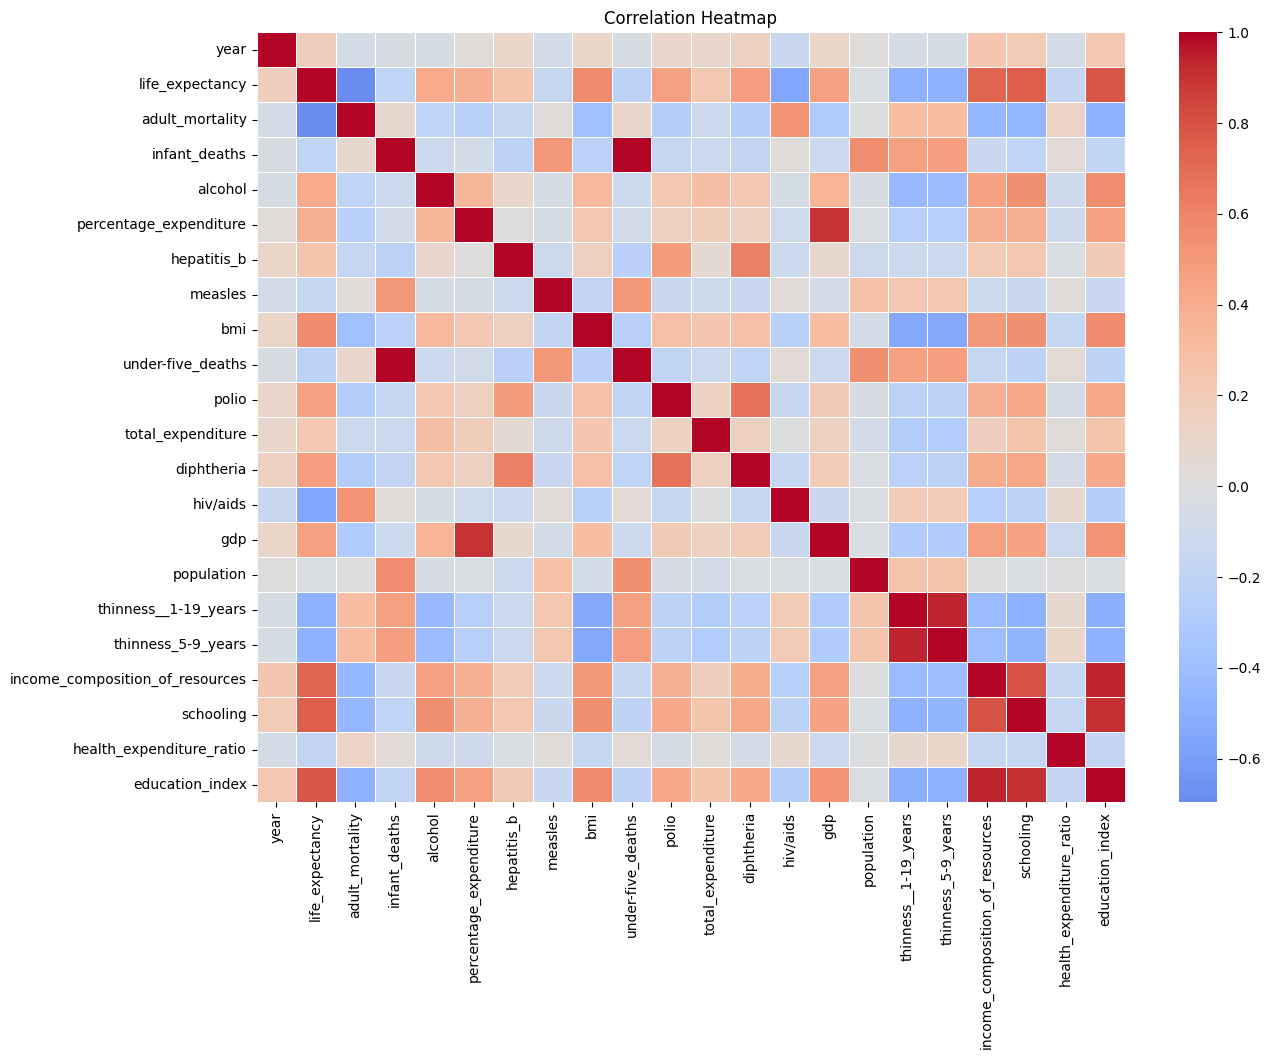

In [13]:
numeric_cols = dataset.select_dtypes(
    include=["int64", "float64"]
).columns

plt.figure(figsize=(14,10))
corr = dataset[numeric_cols].corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()

#### drop null in target

In [14]:
dataset = dataset.dropna(subset=["life_expectancy"])

In [15]:
# Define Target & Features
X = dataset.drop(columns=["life_expectancy"])
y = dataset["life_expectancy"]

#### Define numeric_features and categorical_features

In [16]:
numeric_features = X.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()

categorical_features = X.select_dtypes(
    include=["object"]
).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['year', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'health_expenditure_ratio', 'education_index']
Categorical features: ['country', 'status']


#### Preprocessing Pipelines 

In [17]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False
    ))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="drop"
)

# ✅ 6: Train–Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

### Linear Regression

In [19]:
lin_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lin_reg.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Random Forest Regressor

In [20]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# ✅7: Model Evaluation

In [21]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }

results = pd.DataFrame({
    "Linear Regression": evaluate(
        lin_reg, X_train, X_test, y_train, y_test
    ),
    "Random Forest": evaluate(
        rf_model, X_train, X_test, y_train, y_test
    )
})

results

,Linear Regression,Random Forest
Train R2,0.965316,0.991835
Test R2,0.954790,0.965139
Test MAE,1.225976,1.129810
Test RMSE,1.977543,1.736514


## Cross‑Validation

In [22]:
cv_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)

print("Random Forest CV R2 Mean:", cv_scores.mean())

Random Forest CV R2 Mean: 0.9589265709384757


## Feature Importance

In [23]:
feature_names = (
    rf_model
    .named_steps["preprocessor"]
    .get_feature_names_out()
)

importances = (
    rf_model
    .named_steps["model"]
    .feature_importances_
)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
12,num__hiv/aids,0.598551
17,num__income_composition_of_resources,0.150416
1,num__adult_mortality,0.122884
20,num__education_index,0.022797
7,num__bmi,0.018935
8,num__under-five_deaths,0.014874
16,num__thinness_5-9_years,0.008038
18,num__schooling,0.007779
0,num__year,0.006617
3,num__alcohol,0.006006


## Feature Importance Visualization

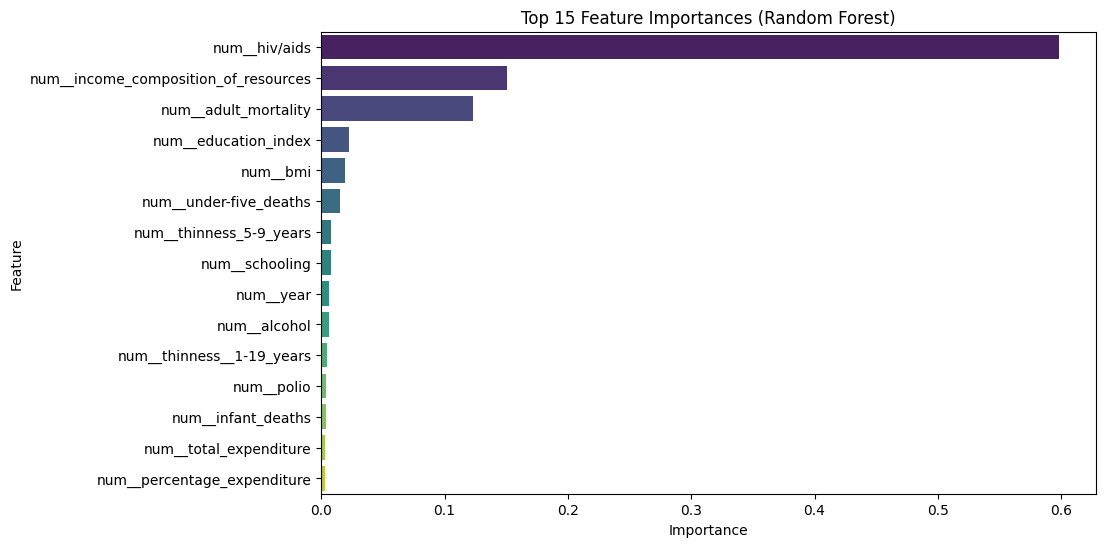

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=importance_df.head(15),
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

## Actual vs Predicted Visualization


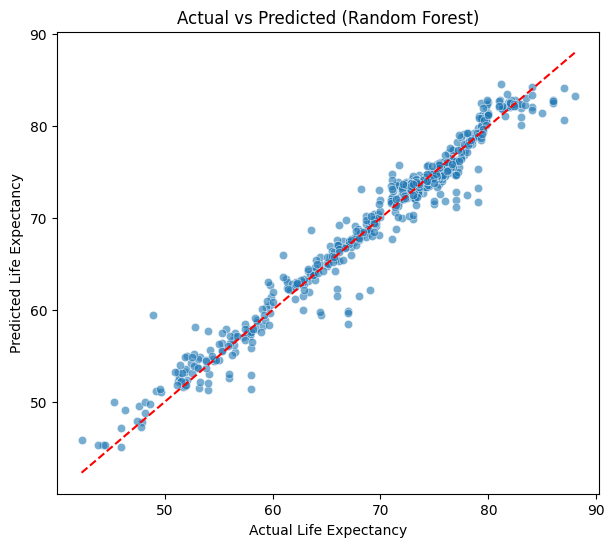

In [25]:
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--"
)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

## Residual Analysis

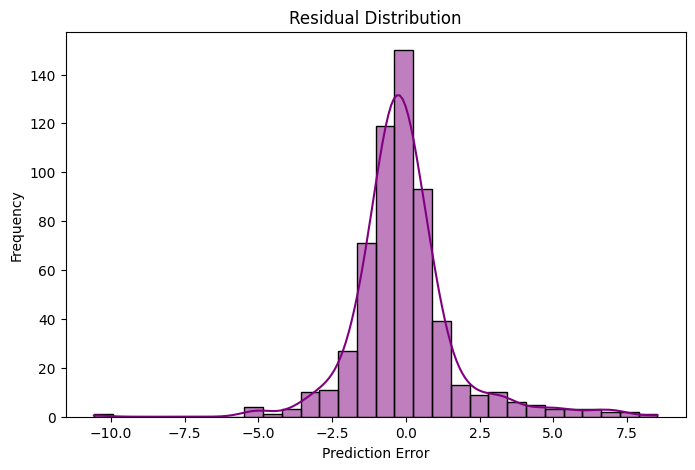

In [26]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()